# Chapter 4: Representing Data and Engineering Features

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import sklearn
import mglearn

## 1. Categorical Variables

### 1.1 One-Hot-Encoding (Dummy variables)

In [2]:
data = pd.read_csv('../data/adult.data', header=None, index_col=False,
                   names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
                          'marital-status', 'occupation', 'relationship', 'race', 'gender',
                          'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 
                          'income'])

data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]
display(data.head())

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [3]:
print(type(data))
print(data.gender.value_counts())

<class 'pandas.core.frame.DataFrame'>
 Male      21790
 Female    10771
Name: gender, dtype: int64


In [5]:
print("Original features: ", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Features after get_dummies: ", list(data_dummies.columns))

Original features:  ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Features after get_dummies:  ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-i

In [6]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [15]:
# Choose only feature columns (i.e. all columns from 'age' to 'occupation_ Transport-moving')
# This range contains all features except target value ('income_')
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# Extract NumPy arrays
X = features.values
print("Head of X:\n", X[:2], "\n")
y = data_dummies['income_ >50K'].values
print("X shape: {}\ny shape: {}".format(X.shape, y.shape))

Head of X:
 [[39 40  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0
   0  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [50 13  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0
   0  0  0  0  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]] 

X shape: (32561, 44)
y shape: (32561,)


In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print("Accuracy on test set: {:.2f}".format(logreg.score(X_test, y_test)))

Accuracy on test set: 0.81


### 1.2 Numbers can be encoded as categories

In [19]:
demo_df = pd.DataFrame({'Numbering feature': [0, 1, 2, 1],
                        'Categorical feature': ['socks', 'fox', 'socks', 'box']})
display(demo_df)

,Numbering feature,Categorical feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


pd.get_dummies will encode only 'text' feature and leave the numbering feature unchanged

In [20]:
pd.get_dummies(demo_df)

,Numbering feature,Categorical feature_box,Categorical feature_fox,Categorical feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [25]:
demo_df['Numbering feature'] = demo_df['Numbering feature'].astype(str)
pd.get_dummies(demo_df, columns=['Numbering feature', 'Categorical feature'])

,Numbering feature_0,Numbering feature_1,Numbering feature_2,Categorical feature_box,Categorical feature_fox,Categorical feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


## 2. Binning, Sampling, Linear models and Trees

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

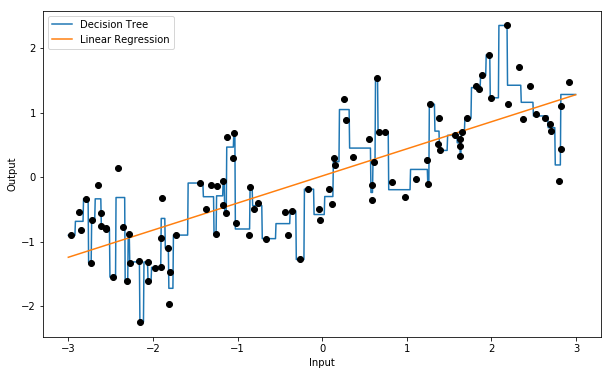

In [36]:
plt.figure(figsize=(10, 6))

X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="Decision Tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="Linear Regression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Output")
plt.xlabel("Input")
plt.legend(loc='best');

In [37]:
bins = np.linspace(-3, 3, 11)
print("Categories: ", bins)

Categories:  [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [40]:
which_bin = np.digitize(X, bins=bins)
print("\nData Points:\n", X[:5])
print("\nCategories for Data Points:\n", which_bin[:5])


Data Points:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Categories for Data Points:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


In [41]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False)
# encoder.fit finds unique values in which_bin
encoder.fit(which_bin)
# transform performs one-hot-encoding
X_binned = encoder.transform(which_bin)
print(X_binned[:5])

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [42]:
print('X_binned shape: ', X_binned.shape)

X_binned shape:  (100, 10)


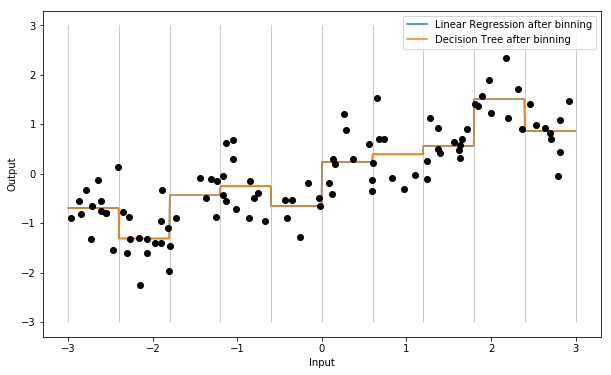

In [44]:
plt.figure(figsize=(10, 6))

line_binned = encoder.transform(np.digitize(line, bins=bins))

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label="Linear Regression after binning")

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label="Decision Tree after binning")

plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel("Output")
plt.xlabel("Input");

## 3. Interactions and Polynomials _(interaction features and polynomial features)_

In [45]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

(100, 11)


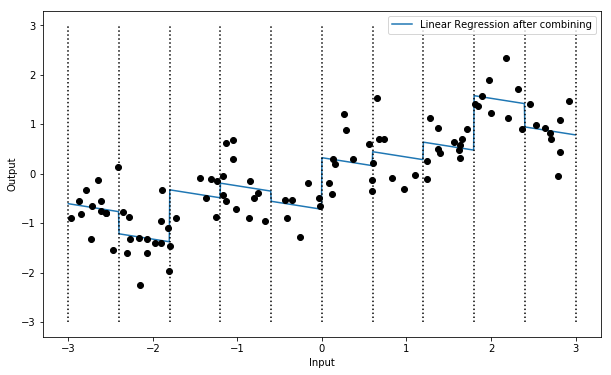

In [55]:
plt.figure(figsize=(10, 6))

reg = LinearRegression().fit(X_combined, y)
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label="Linear Regression after combining")

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')

plt.legend(loc="best")
plt.xlabel("Input")
plt.ylabel("Output")
plt.plot(X[:, 0], y, 'o', c='k');

In [56]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)

(100, 20)


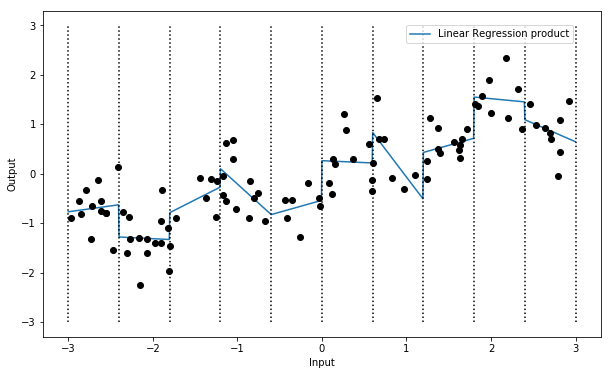

In [70]:
plt.figure(figsize=(10, 6))

reg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label="Linear Regression product")

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
plt.xlabel("Input")
plt.ylabel("Output")
plt.plot(X[:, 0], y, 'o', c='k')
plt.legend(loc=(0.65, 0.9));

#### Polynomials

In [71]:
from sklearn.preprocessing import PolynomialFeatures

# set power of polynom to 10
# default value "include_bias=True" adds a constant feature-value 1
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)

In [72]:
print("X_poly shape: ", X_poly.shape)

X_poly shape:  (100, 10)


In [74]:
print("Elements of X:\n", X[:5])
print("\nElements of X_poly:\n", X_poly[:5])

Elements of X:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

Elements of X_poly:
 [[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [86]:
print("Polynomial feature names:\n", poly.get_feature_names())

Polynomial feature names:
 ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


###### Polynomial regression

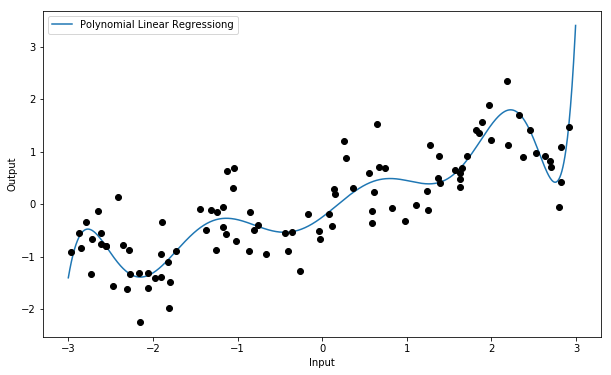

In [87]:
plt.figure(figsize=(10, 6))

reg = LinearRegression().fit(X_poly, y)

line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label="Polynomial Linear Regressiong")
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Output")
plt.xlabel("Input")
plt.legend(loc='best');

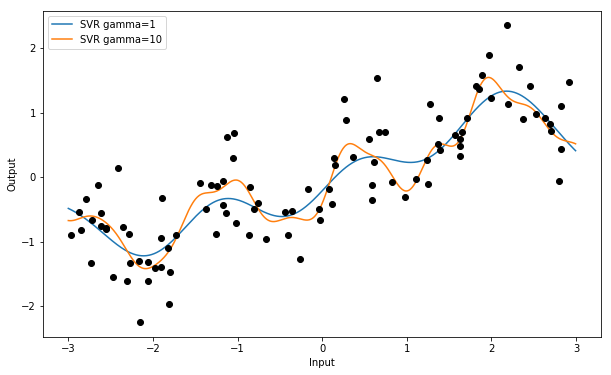

In [89]:
from sklearn.svm import SVR

plt.figure(figsize=(10, 6))
for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label="SVR gamma={}".format(gamma))

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Output")
plt.xlabel("Input")
plt.legend(loc='best');

In [90]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=0)

# Scale data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [91]:
poly = PolynomialFeatures(degree=2).fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print("X_train shape:", X_train.shape)
print("X_train_poly shape:", X_train_poly.shape)

X_train shape: (379, 13)
X_train_poly shape: (379, 105)


In [92]:
print("Polynomial feature names:\n", poly.get_feature_names())

Polynomial feature names:
 ['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x9^2', 'x9 x10', 'x9 x11', 'x9 x12', 'x10^2', 'x10 x11', 'x10 x12', 'x11^2', 'x11 x12', 'x12^2']


In [94]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train_scaled, y_train)
print("Accuracy on test set without interactions: {:.3f}".format(ridge.score(X_test_scaled, y_test)))
ridge = Ridge().fit(X_train_poly, y_train)
print("Accuracy on test set with interactions: {:.3f}".format(ridge.score(X_test_poly, y_test)))

Accuracy on test set without interactions: 0.577
Accuracy on test set with interactions: 0.741


But random forest will give better results even without polynomical feature transformations

In [96]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print("Accuracy on test set without interactions: {:.3f}".format(rf.score(X_test_scaled, y_test)))
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Accuracy on test set with interactions: {:.3f}".format(rf.score(X_test_poly, y_test)))

Accuracy on test set without interactions: 0.800
Accuracy on test set with interactions: 0.747


## 4. One-dimensional nonlinear transformations

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import sklearn
import mglearn

In [2]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [41]:
print(X.shape)

(1000, 3)


In [8]:
a = np.array([1, 1, 18, 2, 1, 2, 2, 3, 4, 4])
np.bincount(a)

array([0, 3, 3, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [9]:
print("Feature frequences:\n", np.bincount(X[:, 0]))

Feature frequences:
 [28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


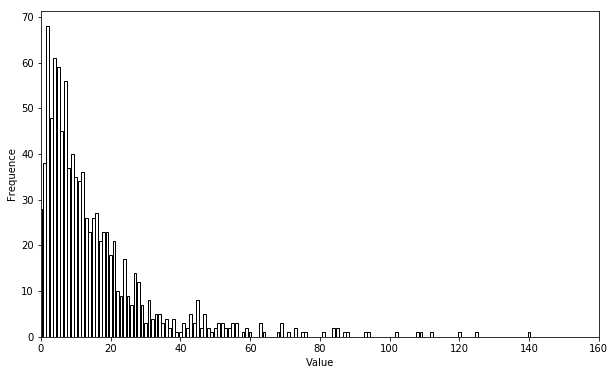

In [18]:
plt.figure(figsize=(10, 6))
plt.xlim(0, 160)

bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='w', edgecolor='k')
plt.ylabel("Frequence")
plt.xlabel("Value");

In [20]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Accuracy on test set: {:.3f}".format(score))

Accuracy on test set: 0.622


In [21]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

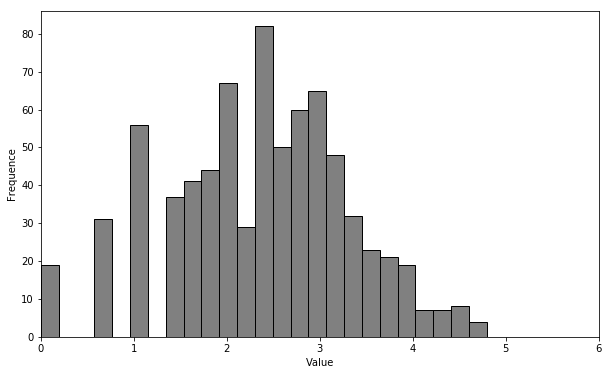

In [27]:
plt.figure(figsize=(10, 6))
plt.xlim(0, 6)

plt.hist(X_train_log[:, 0], bins=25, color='grey', edgecolor='k')
plt.ylabel("Frequence")
plt.xlabel("Value");

In [28]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Accuracy on test set: {:.3f}".format(score))

Accuracy on test set: 0.875


## 5. Automatical features selection

### 5.1 Univariate statistics

In [42]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split

In [43]:
cancer = load_breast_cancer()

rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# add noise features to original data
# first 30 features are original and the last 50 are noise
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(X_w_noise, cancer.target, random_state=0, test_size=.5)
# use f_classif (by default)
# and SelectPercentile to select 50% of features
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# transform train dataset
X_train_selected = select.transform(X_train)

print("X_train shape: ", X_train.shape)
print("X_train_selected shape: ", X_train_selected.shape)

X_train shape:  (284, 80)
X_train_selected shape:  (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


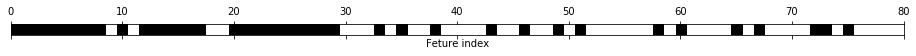

In [59]:
mask = select.get_support()
print(mask)
# visualize bool values: black - True, white - False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.yticks(())
plt.xlim(0, 80)
plt.xlabel("Feture index");

In [61]:
from sklearn.linear_model import LogisticRegression

# transform test data
X_test_selected = select.transform(X_test)

lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Accuracy with all features included: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Accuracy with selected features: {:.3f}".format(lr.score(X_test_selected, y_test)))

Accuracy with all features included: 0.930
Accuracy with selected features: 0.940


### 5.2 Model-based selection

In [63]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold="median")

In [64]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train shape: ", X_train.shape)
print("X_train_l1 shape: ", X_train_l1.shape)

X_train shape:  (284, 80)
X_train_l1 shape:  (284, 40)


[ True  True  True  True  True  True  True  True  True  True  True False
  True  True False  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True False False  True False
 False False False False  True False False  True False  True  True False
 False False  True False False  True  True False False False False False
 False  True False False False False False False False  True False False
 False  True False False False False False False]


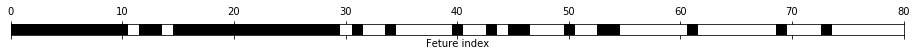

In [65]:
mask = select.get_support()
print(mask)
# visualize bool values: black - True, white - False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.yticks(())
plt.xlim(0, 80)
plt.xlabel("Feture index");

In [66]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Accuracy on test set: {:.3f}".format(score))

Accuracy on test set: 0.951


### 5.3 Iterative selection

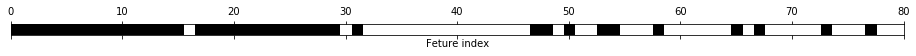

In [67]:
from sklearn.feature_selection import RFE  # recursive feature elimination
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=40)
select.fit(X_train, y_train)
# visualize
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.yticks(())
plt.xlim(0, 80)
plt.xlabel("Feture index");

In [68]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)
score = LogisticRegression().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)
print("Accuracy on test set: {:.3f}".format(score))

Accuracy on test set: 0.951


In [69]:
print("Accuracy on test set: {:.3f}".format(select.score(X_test, y_test)))

Accuracy on test set: 0.951


## 6. Expert knowlege

In [80]:
test = pd.DataFrame({'one': [1, 1, 1, 1], 'two': ['Bob', 'Eva', 'Alice', 'John']}, index=['A', 'A', 'B', 'B'])
display(test)
test.groupby(test.index).sum()

,one,two
A,1,Bob
A,1,Eva
B,1,Alice
B,1,John


,one
A,2
B,2


In [7]:
def load_citibike():
    data_mine = pd.read_csv('../data/citibike.csv')
    data_mine['one'] = 1  # Each datapoint in dataset is one bike
    data_mine['starttime'] = pd.to_datetime(data_mine.starttime)
    data_starttime = data_mine.set_index("starttime")
    data_resampled = data_starttime.resample("3h").sum().fillna(0)
    return data_resampled.one
citibike = load_citibike()

In [6]:
print("Citi Bike:\n", citibike.head())

Citi Bike:
 starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64


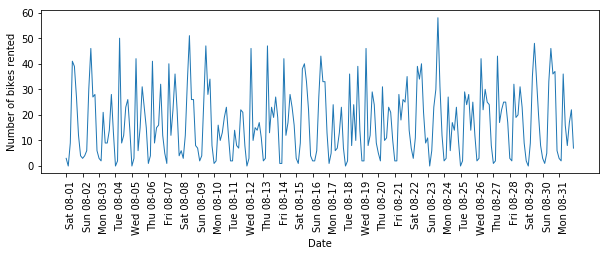

In [100]:
plt.figure(figsize=(10, 3))
xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max(), freq='D')
plt.xticks(xticks, xticks.strftime('%a %m-%d'), rotation=90, ha="left")
plt.plot(citibike, linewidth=1)
plt.xlabel("Date")
plt.ylabel("Number of bikes rented");

In [124]:
y = citibike.values
# transform time to POSIX format
X = np.array(citibike.index.astype("int64")).reshape(-1, 1) // 10**9
X.shape

(248, 1)

In [115]:
# use the first 184 points for learning and all other points for testing
n_train = 184

def eval_on_features(features, target, regressor):
    # split array on train and test sets
    X_train, X_test = features[:n_train], features[n_train:]
    # split target array too
    y_train, y_test = target[:n_train], target[n_train:]
    regressor.fit(X_train, y_train)
    print("R^2 for test set: {:.2f}".format(regressor.score(X_test, y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(12, 6))
    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90, ha="left")
    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="predict train")
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label="predict test")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Data")
    plt.ylabel("Number of bikes rented");

R^2 for test set: -0.04


<Figure size 432x288 with 0 Axes>

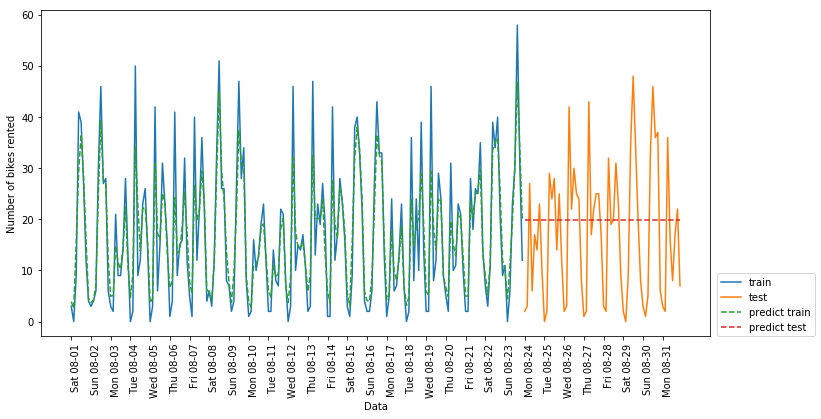

In [116]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=100, random_state=0)
plt.figure()
eval_on_features(X, y, regressor)

R^2 for test set: 0.60


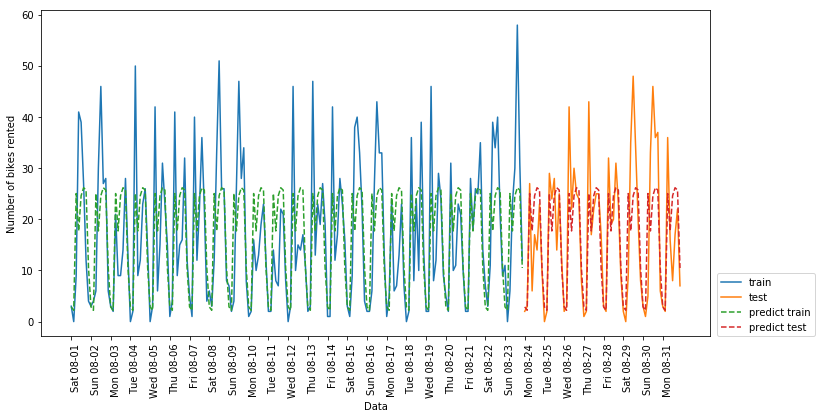

In [123]:
X_hour = np.array(citibike.index.hour).reshape(-1, 1)
eval_on_features(X_hour, y, regressor)

R^2 for test set: 0.84


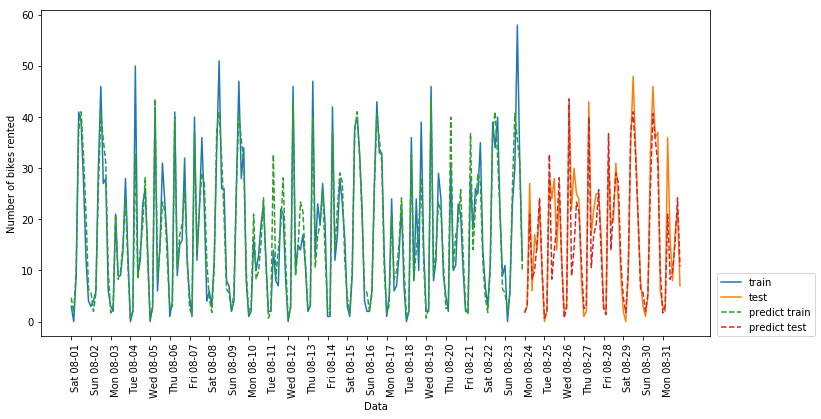

In [129]:
X_hour_week = np.hstack([np.array(citibike.index.dayofweek).reshape(-1, 1),
                         np.array(citibike.index.hour).reshape(-1, 1)])
eval_on_features(X_hour_week, y, regressor)

R^2 for test set: 0.13


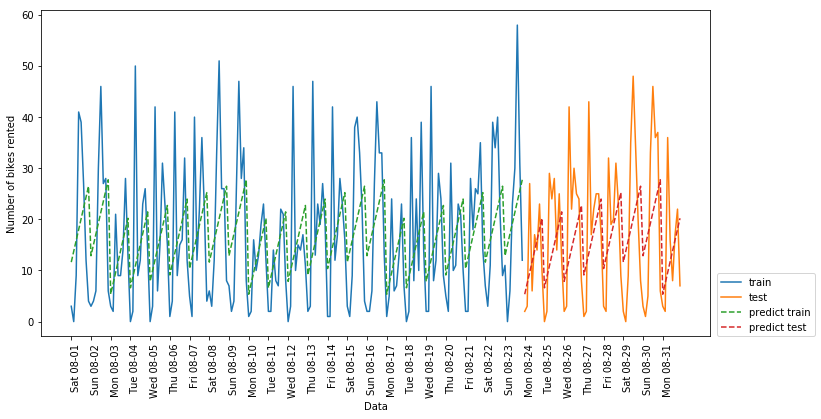

In [126]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())

In [130]:
from sklearn.preprocessing import OneHotEncoder

In [133]:
enc = OneHotEncoder()
X_hour_week_onehot = enc.fit_transform(X_hour_week).toarray()
X_hour_week_onehot[:3]

array([[0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

R^2 for test set: 0.62


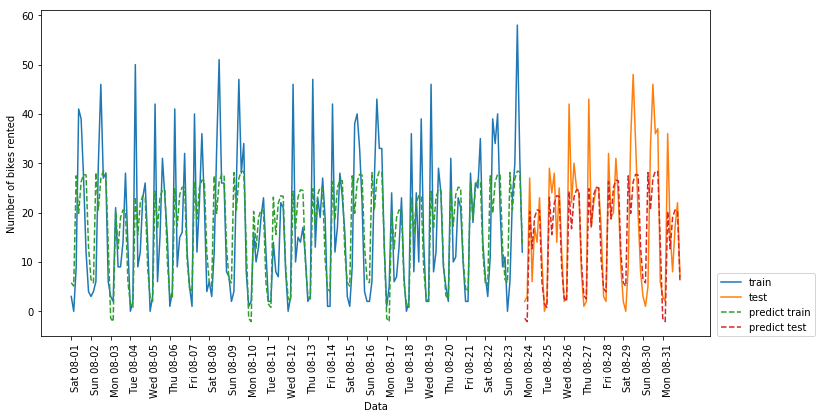

In [134]:
eval_on_features(X_hour_week_onehot, y, Ridge())

In [135]:
from sklearn.preprocessing import PolynomialFeatures

['x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x0 x13', 'x0 x14', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x1 x13', 'x1 x14', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x2 x13', 'x2 x14', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x3 x13', 'x3 x14', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x4 x13', 'x4 x14', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x5 x13', 'x5 x14', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x6 x13', 'x6 x14', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x7 x13', 'x7 x14', 'x8 x9', 'x8 x10', 'x8 x11', 'x8 x12', 'x8 x13', 'x8 x14', 'x9 x10', 'x9 x11', 'x9 x12', 'x9 x13', 'x9 x14',

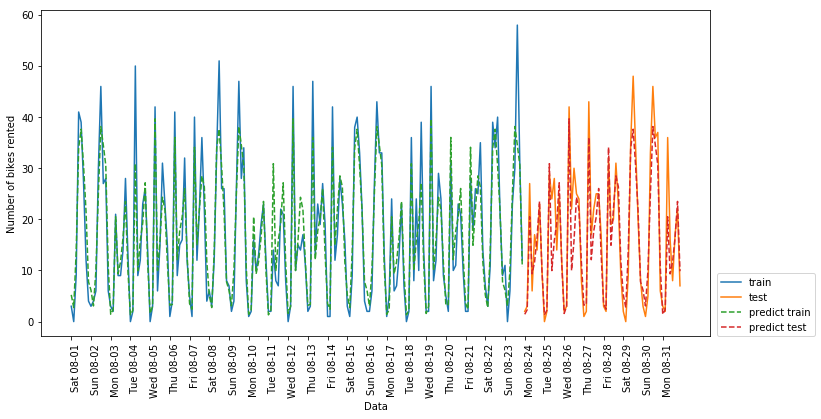

In [140]:
poly_transformer = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
print(poly_transformer.fit(X_hour_week_onehot).get_feature_names(), "\n")
X_hour_week_onehot_poly = poly_transformer.fit_transform(X_hour_week_onehot)
lr = Ridge()
eval_on_features(X_hour_week_onehot_poly, y, lr)

In [142]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features = day + hour

In [146]:
features_poly = poly_transformer.get_feature_names(features)
features_nonzero = np.array(features_poly)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]

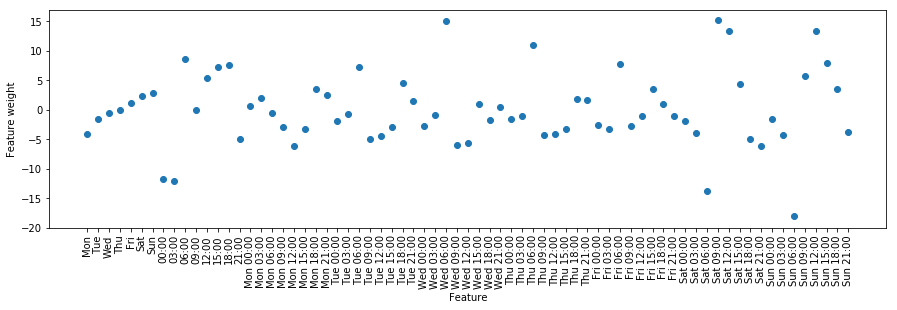

In [154]:
plt.figure(figsize=(15, 4))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.yticks(range(-20, 20, 5))
plt.ylabel("Feature weight")
plt.xlabel("Feature");

# Chapter 5: Model Evaluation and Improvement

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import pandas as pd
import sklearn
import mglearn

In [2]:
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# make synthetic data set
X, y = make_blobs(random_state=0)
# split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# create a model and fit it to the training set
logreg = LogisticRegression().fit(X_train, y_train)
# evaluate the model on the test set
print("Test set score: {:.2f}".format(logreg.score(X_test, y_test)))

Test set score: 0.88


## 1. Cross-validation

5-fold cross-validation

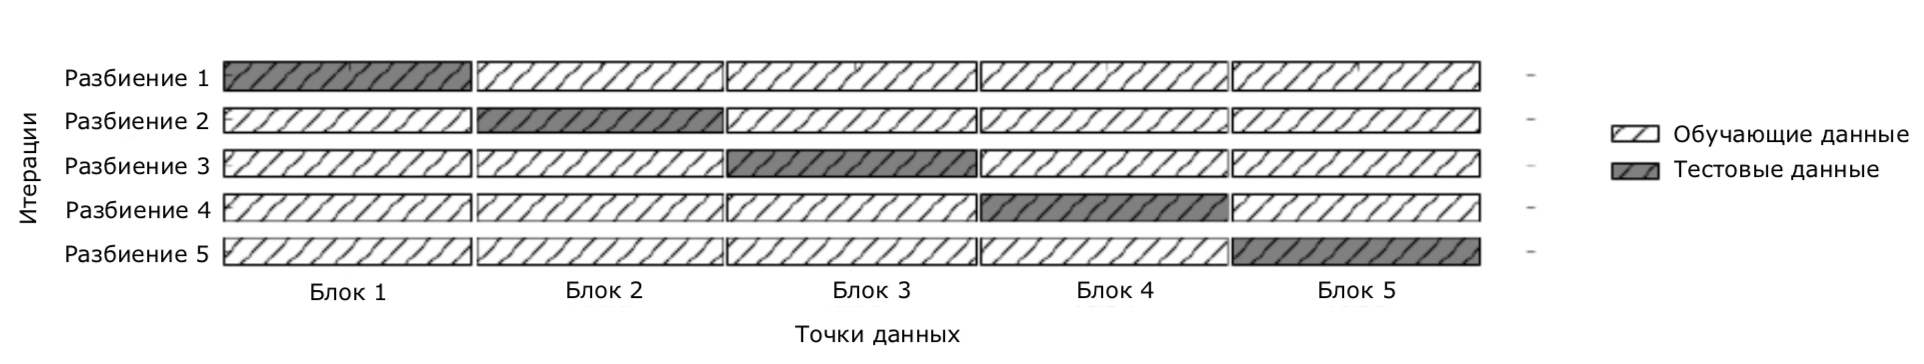

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [4]:
iris = load_iris()
logreg = LogisticRegression()

scores = cross_val_score(logreg, iris.data, iris.target)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [0.96078431 0.92156863 0.95833333]


In [5]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print("Cross-validation scores: {}".format(scores))

Cross-validation scores: [1.         0.96666667 0.93333333 0.9        1.        ]


In [6]:
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Average cross-validation score: 0.96


### 1.1 Stratified k-fold cross-validation and other strategies

In [7]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris labels:\n", iris.target)

Iris labels:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


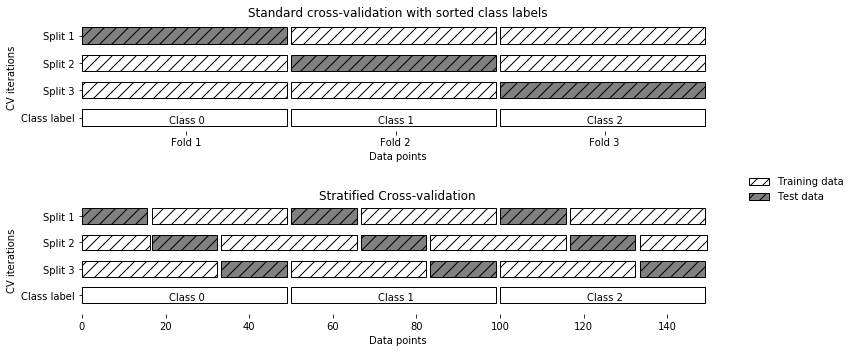

In [8]:
mglearn.plots.plot_stratified_cross_validation()

### 1.1.1 More control over cross-validation

In [9]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

In [10]:
print("Cross-validation scores (5 folds without stratification): ", 
      cross_val_score(logreg, iris.data, iris.target, cv=kfold))

Cross-validation scores (5 folds without stratification):  [1.         0.93333333 0.43333333 0.96666667 0.43333333]


In [11]:
kfold = KFold(n_splits=3)
print("Cross-validation scores (3 folds without stratification): ", 
      cross_val_score(logreg, iris.data, iris.target, cv=kfold))

Cross-validation scores (3 folds without stratification):  [0. 0. 0.]


We can shuffle data and targets:

In [12]:
kfold = KFold(n_splits=3, shuffle=True, random_state=0)
print("Cross-validation scores: ", cross_val_score(logreg, iris.data, iris.target, cv=kfold))

Cross-validation scores:  [0.9  0.96 0.96]


#### Leave-one-out cross validation

In [13]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()
scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)
print("Number of cv iterations: ", len(scores))
print("Mean accuracy: {:.2f}".format(scores.mean()))

Number of cv iterations:  150
Mean accuracy: 0.95


#### Shuffle-split cross-validation

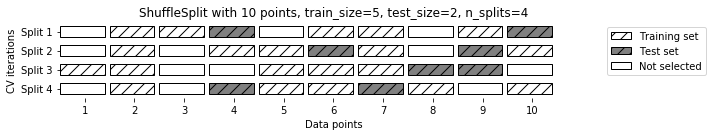

In [14]:
mglearn.plots.plot_shuffle_split()

In [15]:
from sklearn.model_selection import ShuffleSplit
shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=10) # split dataset into test and train sets in proportion 50|50; do this 10 times
scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)
print("Cross-validation scores:\n", scores)

Cross-validation scores:
 [0.89333333 0.94666667 0.94666667 0.96       0.93333333 0.96
 0.85333333 0.97333333 0.98666667 0.93333333]


#### Cross-validation with groups

In [16]:
from sklearn.model_selection import GroupKFold
# create synthetic dataset
X, y = make_blobs(n_samples=12, random_state=0)
# assume the first three samples belong to the same group
# then the next four, etc
groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores: ", scores)

Cross-validation scores:  [0.75       0.8        0.66666667]


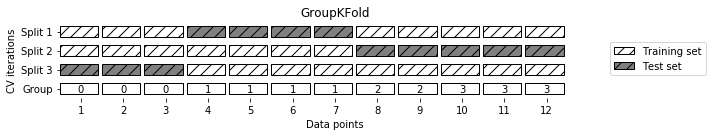

In [17]:
mglearn.plots.plot_group_kfold()

## 2. Grid Search

### 2.1 Simple Grid-Search

In [18]:
# naive grid-search implementation
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)
print("Size of training set: {}\nSize of test set: {}".format(X_train.shape[0], X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        # evaluate the SVC on the test set
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}

print("Best score: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))

Size of training set: 112
Size of test set: 38
Best score: 0.97
Best parameters: {'C': 100, 'gamma': 0.001}


### 2.2 The danger of overfitting the parameters and the validation set

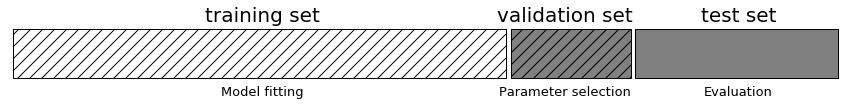

In [19]:
mglearn.plots.plot_threefold_split()

In [20]:
from sklearn.svm import SVC
# split data into train+validation set and test set
X_trainval, X_test, y_trainval, y_test = train_test_split(iris.data, iris.target, random_state=0)
# split train+validation set into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_trainval, y_trainval, random_state=1)
print("Size of training set: {}\nSize of validation set: {}\nSize of test set: {}".format(X_train.shape[0],
                                                                                        X_valid.shape[0],
                                                                                        X_test.shape[0]))

best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_valid, y_valid)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval)
test_score = svm.score(X_test, y_test)
print("Best score on validation set: {:.2f}".format(best_score))
print("Best parameters: {}".format(best_parameters))
print("Test set score with best parameters: {:.2f}".format(test_score))

Size of training set: 84
Size of validation set: 28
Size of test set: 38
Best score on validation set: 0.96
Best parameters: {'C': 10, 'gamma': 0.001}
Test set score with best parameters: 0.92


### 2.3 Grid-Search with cross-validation

In [21]:
best_score = 0

for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        # perform cross-validation
        scores = cross_val_score(svm, X_trainval, y_trainval, cv=5)
        score = np.mean(scores)
        if score > best_score:
            best_score = score
            best_parameters = {'C': C, 'gamma': gamma}
svm = SVC(**best_parameters)
svm.fit(X_trainval, y_trainval);

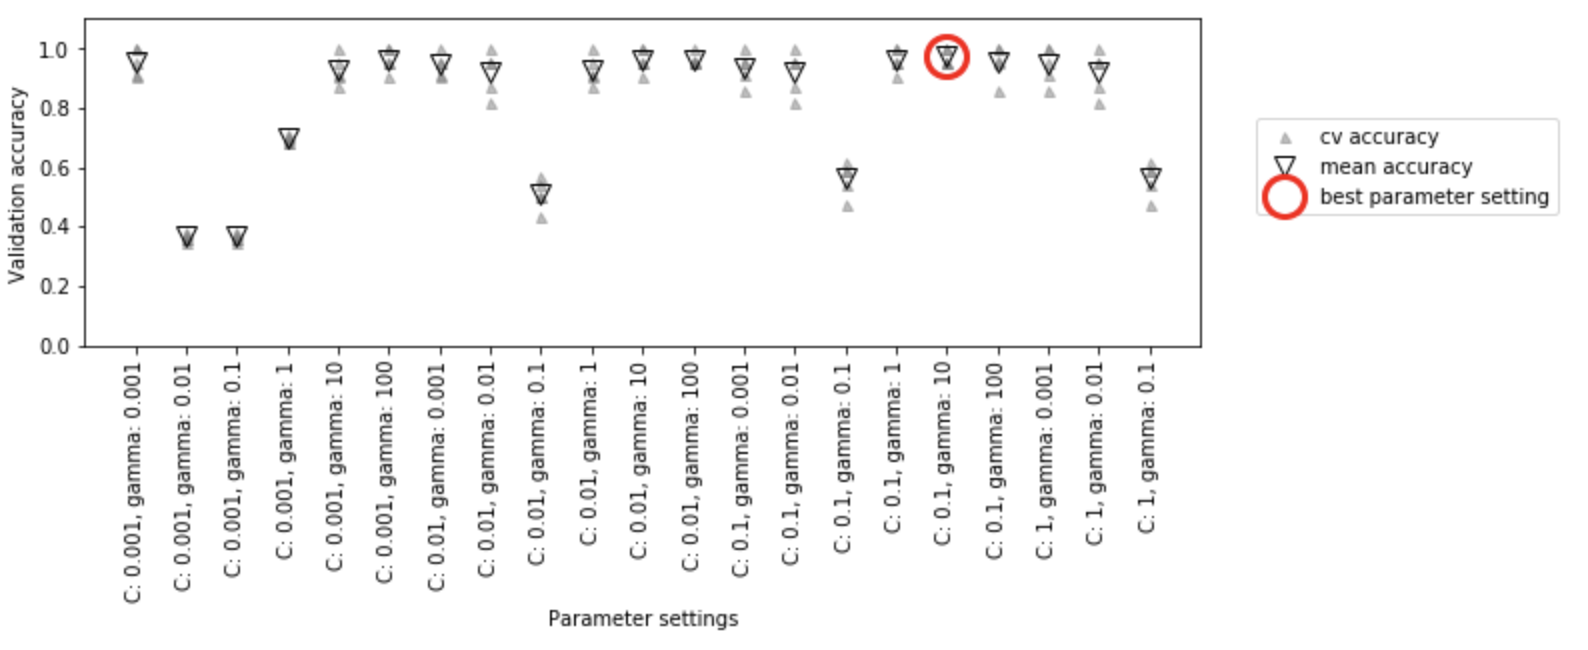

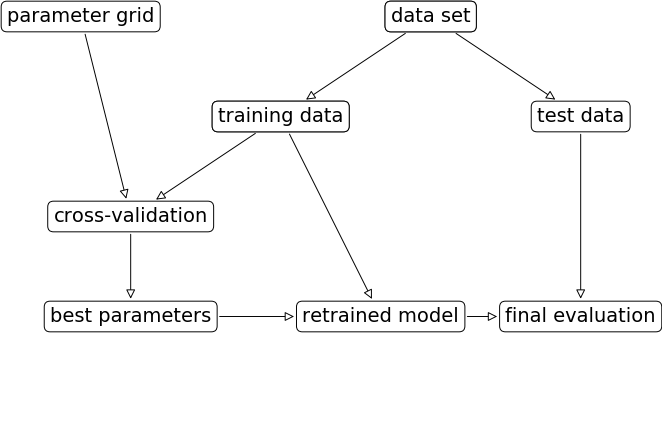

In [22]:
mglearn.plots.plot_grid_search_overview()

In [23]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
print("Parameter grid:\n", param_grid)

Parameter grid:
 {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}


In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

In [26]:
grid_search.fit(X_train, y_train);  # creates a model with the best parameters

In [27]:
print("Accuracy on the test set: {:.2f}".format(grid_search.score(X_test, y_test)))

Accuracy on the test set: 0.97


In [28]:
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters:  {'C': 100, 'gamma': 0.01}
Best cross-validation score: 0.97


In [29]:
print("Best model:\n", grid_search.best_estimator_)

Best model:
 SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


#### Analizing the result of cross-validation

In [30]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.head())

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.000627,0.000248,0.000224,0.000055,0.001,0.001,"{'C': 0.001, 'gamma': 0.001}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
1,0.000488,0.000044,0.000192,0.000006,0.001,0.01,"{'C': 0.001, 'gamma': 0.01}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
2,0.000453,0.000005,0.000187,0.000001,0.001,0.1,"{'C': 0.001, 'gamma': 0.1}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
3,0.000481,0.000018,0.000193,0.000004,0.001,1,"{'C': 0.001, 'gamma': 1}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852
4,0.000489,0.000023,0.000198,0.000010,0.001,10,"{'C': 0.001, 'gamma': 10}",0.375,0.347826,0.363636,...,0.366071,0.011371,22,0.363636,0.370787,0.366667,0.366667,0.362637,0.366079,0.002852


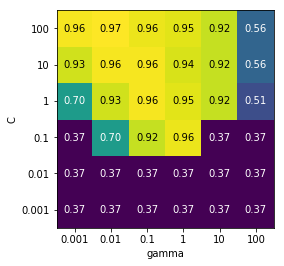

In [31]:
scores = np.array(results.mean_test_score).reshape(6, 6)

mglearn.tools.heatmap(scores, xlabel='gamma', xticklabels=param_grid['gamma'], 
                      ylabel='C', yticklabels=param_grid['C'], cmap='viridis');

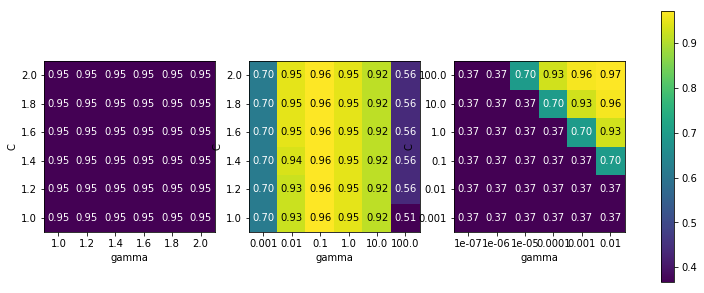

In [32]:
fig, axes  =  plt.subplots(1, 3, figsize=(13, 5))

param_grid_linear = {'C': np.linspace(1, 2, 6),
                     'gamma':  np.linspace(1, 2, 6)}

param_grid_one_log = {'C': np.linspace(1, 2, 6),
                      'gamma':  np.logspace(-3, 2, 6)}

param_grid_range = {'C': np.logspace(-3, 2, 6),
                    'gamma':  np.logspace(-7, -2, 6)}

for param_grid, ax in zip([param_grid_linear, param_grid_one_log,
                           param_grid_range], axes):
    grid_search = GridSearchCV(SVC(), param_grid, cv=5)
    grid_search.fit(X_train, y_train)
    scores = grid_search.cv_results_['mean_test_score'].reshape(6, 6)

    # plot the mean cross-validation scores
    scores_image = mglearn.tools.heatmap(
        scores, xlabel='gamma', ylabel='C', xticklabels=param_grid['gamma'],
        yticklabels=param_grid['C'], cmap="viridis", ax=ax)

plt.colorbar(scores_image, ax=axes.tolist());

#### Economical grid-search

We can use a list of dicts to specify parameters we need in each case

In [33]:
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100],
               'gamma': [0.001, 0.01, 0.1, 1, 10, 100]},
              {'kernel': ['linear'],
               'C': [0.001, 0.01, 0.1, 1, 10, 100]}]
print("List of grids:\n", param_grid)

List of grids:
 [{'kernel': ['rbf'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}, {'kernel': ['linear'], 'C': [0.001, 0.01, 0.1, 1, 10, 100]}]


In [34]:
grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation score: 0.97


In [35]:
results = pd.DataFrame(grid_search.cv_results_)
display(results.T)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
mean_fit_time,0.000613403,0.000496912,0.000527906,0.000584602,0.000536442,0.000477409,0.000517416,0.000550842,0.000839233,0.00075736,...,0.00027442,0.000367594,0.000574684,0.00059638,0.000341606,0.000310183,0.000266838,0.000257874,0.000260019,0.000266695
std_fit_time,0.000235092,5.2806e-05,6.70724e-05,0.000150406,4.89271e-05,7.82594e-06,6.74965e-05,0.000148192,0.000131066,5.27106e-05,...,8.9399e-06,2.01513e-05,1.9553e-05,1.41297e-05,2.14524e-06,1.14838e-06,3.7528e-06,8.3652e-06,8.6564e-06,2.62155e-05
mean_score_time,0.000235367,0.000201797,0.000223637,0.000237417,0.00022974,0.00019784,0.000229836,0.000244904,0.000382233,0.000325489,...,0.000168133,0.000169897,0.000180817,0.000188446,0.000169086,0.000166655,0.00016036,0.000154924,0.000154543,0.000153351
std_score_time,7.334e-05,1.39238e-05,4.05191e-05,6.30332e-05,4.53162e-05,4.96781e-06,5.12515e-05,6.72211e-05,0.000122576,2.05341e-05,...,2.30488e-05,6.12991e-06,1.91092e-06,1.54218e-06,4.25268e-06,3.16298e-06,4.86421e-06,1.38529e-06,2.13993e-06,1.52588e-06
param_C,0.001,0.001,0.001,0.001,0.001,0.001,0.01,0.01,0.01,0.01,...,100,100,100,100,0.001,0.01,0.1,1,10,100
param_gamma,0.001,0.01,0.1,1,10,100,0.001,0.01,0.1,1,...,0.1,1,10,100,NaN,NaN,NaN,NaN,NaN,NaN
param_kernel,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,rbf,...,rbf,rbf,rbf,rbf,linear,linear,linear,linear,linear,linear
params,"{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 10, 'kernel': 'rbf'}","{'C': 0.001, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.001, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}",...,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 1, 'kernel': 'rbf'}","{'C': 100, 'gamma': 10, 'kernel': 'rbf'}","{'C': 100, 'gamma': 100, 'kernel': 'rbf'}","{'C': 0.001, 'kernel': 'linear'}","{'C': 0.01, 'kernel': 'linear'}","{'C': 0.1, 'kernel': 'linear'}","{'C': 1, 'kernel': 'linear'}","{'C': 10, 'kernel': 'linear'}","{'C': 100, 'kernel': 'linear'}"
split0_test_score,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,0.375,...,0.958333,0.916667,0.875,0.541667,0.375,0.916667,0.958333,1,0.958333,0.958333
split1_test_score,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,0.347826,...,1,1,0.956522,0.478261,0.347826,0.826087,0.913043,0.956522,1,1


#### Nested cross-validation

In [36]:
scores = cross_val_score(GridSearchCV(SVC(), param_grid, cv=5), iris.data, iris.target, cv=5)
print("Cross-validation scores: ", scores)
print("Mean cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores:  [0.96666667 1.         0.9        0.96666667 1.        ]
Mean cross-validation score: 0.97


## 3. Evaluating Metrics and Scoring

## 3.1 Binary-classification metrics

### Unbalanced data sets

In [37]:
from sklearn.datasets import load_digits 

In [38]:
digits = load_digits()
y = digits.target == 9
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [39]:
from sklearn.dummy import DummyClassifier
dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print("Unique predicted labels: ", np.unique(pred_most_frequent))
print("Test set score: {:.2f}".format(dummy_majority.score(X_test, y_test)))

Unique predicted labels:  [False]
Test set score: 0.90


In [40]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print("{} of {} predicted as numer 9".format(np.argwhere(pred_tree).size, pred_tree.size))
print("Test set accuracy: {:.2f}".format(tree.score(X_test, y_test)))

36 of 450 predicted as numer 9
Test set accuracy: 0.92


In [41]:
from sklearn.linear_model import LogisticRegression
dummy = DummyClassifier().fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print("dummy accuracy: {:.2f}".format(dummy.score(X_test, y_test)))
logreg = LogisticRegression(C=0.1).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print("logreg accuracy: {:.2f}".format(logreg.score(X_test, y_test)))

dummy accuracy: 0.81
logreg accuracy: 0.98


### Confusion matrix

In [42]:
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, pred_logreg)
print("Confusion matrix:\n", confusion)

Confusion matrix:
 [[401   2]
 [  8  39]]


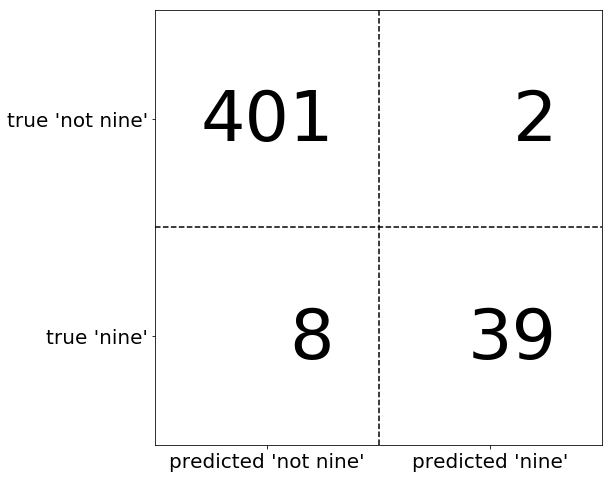

In [43]:
mglearn.plots.plot_confusion_matrix_illustration()

- TN - true negative (class 'not-nine')
- TP - true positive (class 'nine')
- FN - false negative (original class is 'nine' but predicted class is 'not-nine')
- FP - false positive (original class in 'not-nine' but predicted class is 'nine')

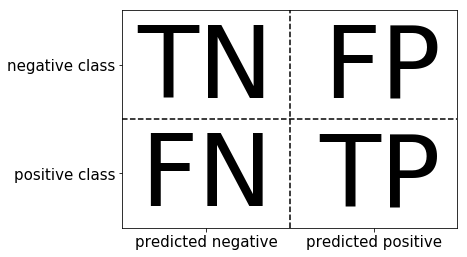

In [44]:
mglearn.plots.plot_binary_confusion_matrix()

In [45]:
print("Most frequent class:")
print(confusion_matrix(y_test, pred_most_frequent))
print("\nDummy model:")
print(confusion_matrix(y_test, pred_dummy))
print("\nDecision tree:")
print(confusion_matrix(y_test, pred_tree))
print("\nLogistic regression:")
print(confusion_matrix(y_test, pred_logreg))

Most frequent class:
[[403   0]
 [ 47   0]]

Dummy model:
[[371  32]
 [ 46   1]]

Decision tree:
[[390  13]
 [ 24  23]]

Logistic regression:
[[401   2]
 [  8  39]]


### Relation to accuracy

$$Accuracy = \frac{TN + TP}{TP + TN + FP + FN}$$

### Precision (точность), recall (полнота) and F-score

Precision (positive predictive value, PPV)

$$Precision = \frac{TP}{TP + FP}$$

Recall (sensitivity; hit rate; true positive rate, TPR)

$$Recall = \frac{TP}{TP + FN}$$

_We need to find the best compormiss between Precision and Recall values_

F-measure

$$F = 2\cdot\frac{{precision}\cdot{recall}}{precision + recall}$$

In [46]:
from sklearn.metrics import f1_score
print("f1-score most frequent: {:.2f}".format(f1_score(y_test, pred_most_frequent)))
print("f1-score dummy: {:.2f}".format(f1_score(y_test, pred_dummy)))
print("f1-score tree: {:.2f}".format(f1_score(y_test, pred_tree)))
print("f1-score logreg: {:.2f}".format(f1_score(y_test, pred_logreg)))

f1-score most frequent: 0.00
f1-score dummy: 0.02
f1-score tree: 0.55
f1-score logreg: 0.89


/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [47]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_most_frequent, target_names=["not-nine", "nine"]))

             precision    recall  f1-score   support

   not-nine       0.90      1.00      0.94       403
       nine       0.00      0.00      0.00        47

avg / total       0.80      0.90      0.85       450



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [48]:
print(classification_report(y_test, pred_dummy, target_names=["not-nine", "nine"]))

             precision    recall  f1-score   support

   not-nine       0.89      0.92      0.90       403
       nine       0.03      0.02      0.02        47

avg / total       0.80      0.83      0.81       450



In [49]:
print(classification_report(y_test, pred_logreg, target_names=["not-nine", "nine"]))

             precision    recall  f1-score   support

   not-nine       0.98      1.00      0.99       403
       nine       0.95      0.83      0.89        47

avg / total       0.98      0.98      0.98       450



### Taking uncertainty into account

In [50]:
from mglearn.datasets import make_blobs
X, y = make_blobs(n_samples=(400, 50), centers=2, cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

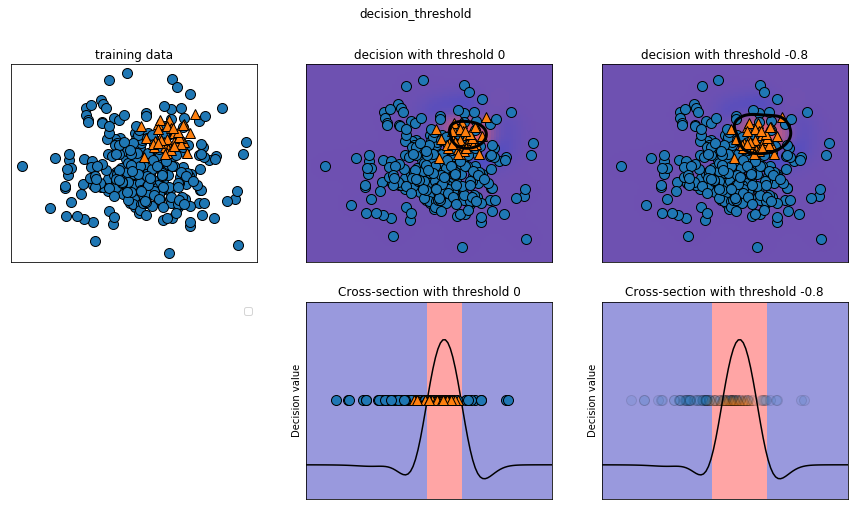

In [51]:
mglearn.plots.plot_decision_threshold()

In [52]:
print(classification_report(y_test, svc.predict(X_test)))

             precision    recall  f1-score   support

          0       0.97      0.89      0.93       104
          1       0.35      0.67      0.46         9

avg / total       0.92      0.88      0.89       113



In [53]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [54]:
print(classification_report(y_test, y_pred_lower_threshold))

             precision    recall  f1-score   support

          0       1.00      0.82      0.90       104
          1       0.32      1.00      0.49         9

avg / total       0.95      0.83      0.87       113



### Precision-Recall curves and ROC curves

In [55]:
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_test, svc.decision_function(X_test))

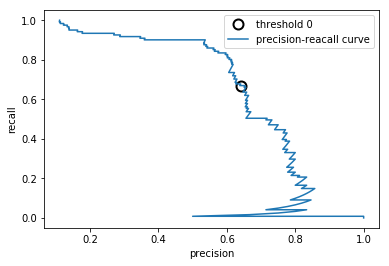

In [56]:
X, y = make_blobs(n_samples=(4000, 500), centers=2, cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)
precision, recall, threshold = precision_recall_curve(y_test, svc.decision_function(X_test))

close_zero = np.argmin(np.abs(threshold))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, 
         label="threshold 0", fillstyle='none', c='k', mew=2)
plt.plot(precision, recall, label="precision-reacall curve")
plt.xlabel("precision")
plt.ylabel("recall")
plt.legend(loc="best");

In [57]:
from sklearn.ensemble import RandomForestClassifier

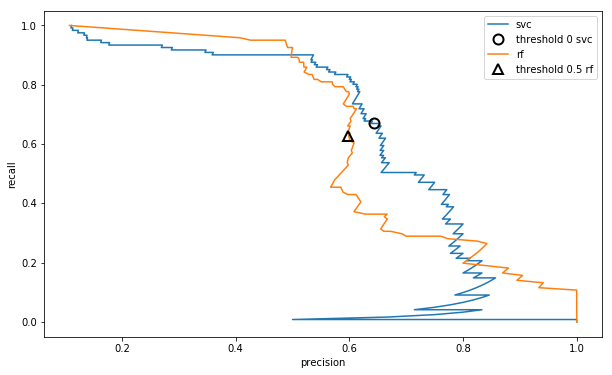

In [58]:
plt.figure(figsize=(10, 6))
rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label="svc")
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10,
         label="threshold 0 svc", fillstyle="none", c='k', mew=2)

plt.plot(precision_rf, recall_rf, label="rf")

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', markersize=10,
         label="threshold 0.5 rf", fillstyle="none", c='k', mew=2)
plt.xlabel("precision")
plt.ylabel("recall")
plt.legend(loc="best");

f1-score takes into account only one point on the precision-recall curve - the point where the threshold is default

In [59]:
print("f1-score for random forest: {:.3f}".format(f1_score(y_test, rf.predict(X_test))))
print("f1-score for SVC: {:.3f}".format(f1_score(y_test, svc.predict(X_test))))

f1-score for random forest: 0.610
f1-score for SVC: 0.656


Average precision:

In [60]:
from sklearn.metrics import average_precision_score
ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print("Average precision of random forest: {:.3f}".format(ap_rf))
print("Average precision of SVC: {:.3f}".format(ap_svc))

Average precision of random forest: 0.660
Average precision of SVC: 0.666


### Reciever Operating Characteristics (ROC-curve) and AUC

False-positive rate (FPR):

$$FPR = \frac{FP}{FP + TN}$$

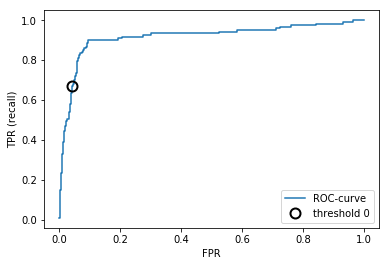

In [61]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label="ROC-curve")
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
# find threshold closest to zero
close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, 
         label="threshold 0", fillstyle="none", c='k', mew=2)
plt.legend(loc=4);

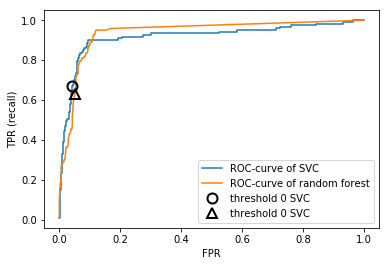

In [63]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label="ROC-curve of SVC")
plt.plot(fpr_rf, tpr_rf, label="ROC-curve of random forest")
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, 
         label="threshold 0 SVC", fillstyle="none", c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr_rf[close_default_rf], '^', markersize=10, 
         label="threshold 0 SVC", fillstyle="none", c='k', mew=2)
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.legend(loc=4);

AUC:

In [64]:
from sklearn.metrics import roc_auc_score
rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print("AUC for random forest: {:.3f}".format(rf_auc))
print("AUC for SVC: {:.3f}".format(svc_auc))

AUC for random forest: 0.937
AUC for SVC: 0.916


gamma = 1.00 accuracy = 0.90 AUC = 0.50
gamma = 0.05 accuracy = 0.90 AUC = 1.00
gamma = 0.01 accuracy = 0.90 AUC = 1.00


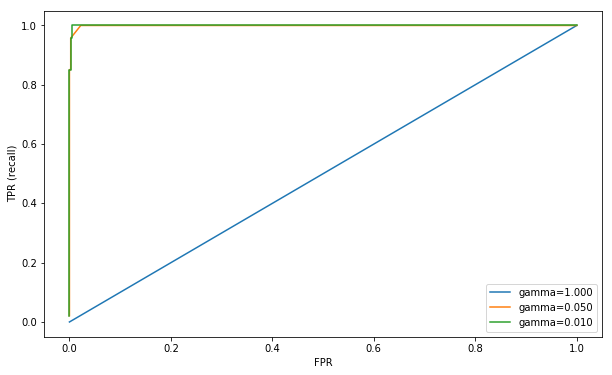

In [68]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

plt.figure(figsize=(10, 6))

for gamma in [1, 0.05, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
    print("gamma = {:.2f} accuracy = {:.2f} AUC = {:.2f}".format(gamma, accuracy, auc))
    plt.plot(fpr, tpr, label="gamma={:.3f}".format(gamma))
plt.xlabel("FPR")
plt.ylabel("TPR (recall)")
plt.legend(loc="best");

## 3.2 Multiclass-classification metrics

In [70]:
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
lr = LogisticRegression().fit(X_train, y_train)
pred = lr.predict(X_test)
print("Accuracy: {:.3f}".format(accuracy_score(y_test, pred)))
print("Confusion matrix:\n", confusion_matrix(y_test, pred))

Accuracy: 0.953
Confusion matrix:
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  2  0]
 [ 0  0 41  3  0  0  0  0  0  0]
 [ 0  0  1 43  0  0  0  0  0  1]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  1  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 52  0  0  0]
 [ 0  1  0  1  1  0  0 45  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  1  0  1  0  0  1 44]]


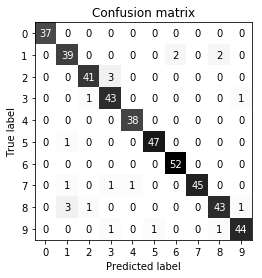

In [79]:
scores_image = mglearn.tools.heatmap(confusion_matrix(y_test, pred), xlabel="Predicted label", 
                                     ylabel="True label", xticklabels=digits.target_names, 
                                     yticklabels=digits.target_names, cmap=plt.cm.gray_r, fmt="%d")
plt.title("Confusion matrix")
plt.gca().invert_yaxis();

In [104]:
y_t = pd.DataFrame(np.argwhere(y_test == 8), columns=['index'])
p_t = pd.DataFrame(np.argwhere(pred == 1), columns=['index'])
pd.merge(y_t, p_t)

,index
0,124
1,196
2,398


In [131]:
print(pred[[124, 196, 398]])
print(y_test[[124, 196, 398]])

[1 1 1]
[8 8 8]


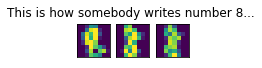

In [133]:
fig, axes = plt.subplots(1, 3, figsize=(2, 1), subplot_kw={'xticks': (), 'yticks': ()})
fig.suptitle("This is how somebody writes number 8...")
for img, ax in zip(X_test[[124, 196, 398]], axes):
    ax.imshow(img.reshape(8, 8))

In [124]:
print(classification_report(y_test, pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        37
          1       0.89      0.91      0.90        43
          2       0.95      0.93      0.94        44
          3       0.90      0.96      0.92        45
          4       0.97      1.00      0.99        38
          5       0.98      0.98      0.98        48
          6       0.96      1.00      0.98        52
          7       1.00      0.94      0.97        48
          8       0.93      0.90      0.91        48
          9       0.96      0.94      0.95        47

avg / total       0.95      0.95      0.95       450



In [125]:
print("Micro average f1-score: {:.3f}".format(f1_score(y_test, pred, average='micro')))  # the same weight for each sample
print("Macro average f1-score: {:.3f}".format(f1_score(y_test, pred, average='macro')))  # the same weight for each class

Micro average f1-score: 0.953
Macro average f1-score: 0.954


## 3.3 Regression metrics